In [1]:
# Using SQL + Pandas
import pandas as pd
import sqlite3

# Data Visualization
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read in the data
one_star = pd.read_csv("Data/Kaggle/one-star-michelin-restaurants.csv")
two_stars = pd.read_csv("Data/Kaggle/two-stars-michelin-restaurants.csv")
three_stars = pd.read_csv("Data/Kaggle/three-stars-michelin-restaurants.csv")

In [3]:
one_star.region.unique()

array(['Austria', 'California', 'Chicago', 'Croatia', 'Czech Republic',
       'Denmark', 'Finland', 'Greece', 'Hong Kong', 'Hungary', 'Macau',
       'Norway', 'New York City', 'Poland', 'Ireland', 'Rio de Janeiro',
       'Sao Paulo', 'South Korea', 'Singapore', 'Sweden', 'Taipei',
       'Thailand', 'Washington DC', 'United Kingdom'], dtype=object)

In [4]:
# Set the mask with U.S. regions
mask = one_star['region'].isin(['California','Chicago','New York City','Washington DC'])

# Assign mask to one_star
one_star = one_star.loc[mask]

one_star['star'] = 'one star'
one_star

,name,year,latitude,longitude,city,region,zipCode,cuisine,price,url,star
12,Chez TJ,2019,37.394680,-122.08044,South San Francisco,California,94041,Contemporary,$$$$,https://guide.michelin.com/us/en/california/so...,one star
13,Protégé,2019,37.427853,-122.14362,South San Francisco,California,94301,Contemporary,$$$,https://guide.michelin.com/us/en/california/so...,one star
14,Madera,2019,37.420140,-122.21151,San Francisco,California,94025,Contemporary,$$$,https://guide.michelin.com/us/en/california/sa...,one star
15,The Village Pub,2019,37.428970,-122.25178,San Francisco,California,94062,Contemporary,$$$,https://guide.michelin.com/us/en/california/sa...,one star
16,Plumed Horse,2019,37.256480,-122.03537,South San Francisco,California,95070,Contemporary,$$$$,https://guide.michelin.com/us/en/california/so...,one star
...,...,...,...,...,...,...,...,...,...,...,...
406,Métier,2019,38.903503,-77.02180,"Washington, D.C.",Washington DC,20001,Contemporary,$$$$,https://guide.michelin.com/us/en/washington/wa...,one star
407,Kinship,2019,38.903282,-77.02180,"Washington, D.C.",Washington DC,20001,Contemporary,$$$,https://guide.michelin.com/us/en/washington/wa...,one star
408,Fiola,2019,38.894160,-77.02032,"Washington, D.C.",Washington DC,20004,Italian,$$$$,https://guide.michelin.com/us/en/washington/wa...,one star
409,Masseria,2019,38.909504,-76.99908,"Washington, D.C.",Washington DC,20002,Italian,$$$,https://guide.michelin.com/us/en/washington/wa...,one star


In [5]:
# Set the mask with U.S. regions
mask = two_stars['region'].isin(['California','Chicago','New York City','Washington DC'])

# Assign mask to two_stars
two_stars = two_stars.loc[mask]

two_stars['star'] = 'two stars'
two_stars.head()

,name,year,latitude,longitude,city,region,zipCode,cuisine,price,url,star
6,Baumé,2019,37.428500,-122.142720,South San Francisco,California,94306,Contemporary,$$$$,https://guide.michelin.com/us/en/california/so...,two stars
7,Commis,2019,37.824760,-122.255050,San Francisco,California,94601,Contemporary,$$$$,https://guide.michelin.com/us/en/california/sa...,two stars
8,Californios,2019,37.755550,-122.417145,San Francisco,California,94110,Mexican,$$$$,https://guide.michelin.com/us/en/california/sa...,two stars
9,Lazy Bear,2019,37.760204,-122.419690,San Francisco,California,94110,Contemporary,$$$$,https://guide.michelin.com/us/en/california/sa...,two stars
10,Saison,2019,37.763270,-122.415430,San Francisco,California,94107,Californian,$$$$,https://guide.michelin.com/us/en/california/sa...,two stars


In [6]:
# Set the mask with U.S. regions
mask = three_stars['region'].isin(['California','Chicago','New York City','Washington DC'])

# Assign mask to three_stars
three_stars = three_stars.loc[mask]

three_stars['star'] = 'three stars'
three_stars.head()

,name,year,latitude,longitude,city,region,zipCode,cuisine,price,url,star
1,Manresa,2019,37.22761,-121.98071,South San Francisco,California,95030,Contemporary,$$$$,https://guide.michelin.com/us/en/california/so...,three stars
2,Benu,2019,37.78521,-122.39876,San Francisco,California,94105,Asian,$$$$,https://guide.michelin.com/us/en/california/sa...,three stars
3,Quince,2019,37.79762,-122.40337,San Francisco,California,94133,Contemporary,$$$$,https://guide.michelin.com/us/en/california/sa...,three stars
4,Atelier Crenn,2019,37.79835,-122.43586,San Francisco,California,94123,Contemporary,$$$$,https://guide.michelin.com/us/en/california/sa...,three stars
5,The French Laundry,2019,38.40443,-122.36474,San Francisco,California,94599,Contemporary,$$$$,https://guide.michelin.com/us/en/california/sa...,three stars


In [7]:
df = pd.concat([one_star,two_stars,three_stars],ignore_index=True)
df

,name,year,latitude,longitude,city,region,zipCode,cuisine,price,url,star
0,Chez TJ,2019,37.394680,-122.08044,South San Francisco,California,94041,Contemporary,$$$$,https://guide.michelin.com/us/en/california/so...,one star
1,Protégé,2019,37.427853,-122.14362,South San Francisco,California,94301,Contemporary,$$$,https://guide.michelin.com/us/en/california/so...,one star
2,Madera,2019,37.420140,-122.21151,San Francisco,California,94025,Contemporary,$$$,https://guide.michelin.com/us/en/california/sa...,one star
3,The Village Pub,2019,37.428970,-122.25178,San Francisco,California,94062,Contemporary,$$$,https://guide.michelin.com/us/en/california/sa...,one star
4,Plumed Horse,2019,37.256480,-122.03537,South San Francisco,California,95070,Contemporary,$$$$,https://guide.michelin.com/us/en/california/so...,one star
...,...,...,...,...,...,...,...,...,...,...,...
197,Per Se,2019,40.768280,-73.98292,New York,New York City,10019,Contemporary,$$$$,https://guide.michelin.com/us/en/new-york-stat...,three stars
198,Le Bernardin,2019,40.761770,-73.98223,New York,New York City,10019,Seafood,$$$$,https://guide.michelin.com/us/en/new-york-stat...,three stars
199,Eleven Madison Park,2019,40.741700,-73.98712,New York,New York City,10010,Contemporary,$$$$,https://guide.michelin.com/us/en/new-york-stat...,three stars
200,Chef's Table at Brooklyn Fare,2019,40.688720,-73.98581,New York,New York City,10018,Contemporary,$$$$,https://guide.michelin.com/us/en/new-york-stat...,three stars


In [8]:
df.dtypes

name          object
year           int64
latitude     float64
longitude    float64
city          object
region        object
zipCode       object
cuisine       object
price         object
url           object
star          object
dtype: object

In [9]:
# Convert categorical variables to vategories
for col in ['city','region','cuisine','price','star']:
    df[col] = df[col].astype('category')

In [10]:
df['price']

0      $$$$
1       $$$
2       $$$
3       $$$
4      $$$$
       ... 
197    $$$$
198    $$$$
199    $$$$
200    $$$$
201    $$$$
Name: price, Length: 202, dtype: category
Categories (3, object): ['$$', '$$$', '$$$$']

In [11]:
df['star']

0         one star
1         one star
2         one star
3         one star
4         one star
          ...     
197    three stars
198    three stars
199    three stars
200    three stars
201    three stars
Name: star, Length: 202, dtype: category
Categories (3, object): ['one star', 'three stars', 'two stars']

In [12]:
df['star'].cat.reorder_categories(['one star','two stars','three stars'],inplace=True)

In [13]:
df1 = df.groupby(['region','star'])['name'].count().reset_index()
df1

,region,star,name
0,California,one star,69
1,California,two stars,14
2,California,three stars,7
3,Chicago,one star,18
4,Chicago,two stars,3
5,Chicago,three stars,1
6,New York City,one star,55
7,New York City,two stars,14
8,New York City,three stars,5
9,Washington DC,one star,13


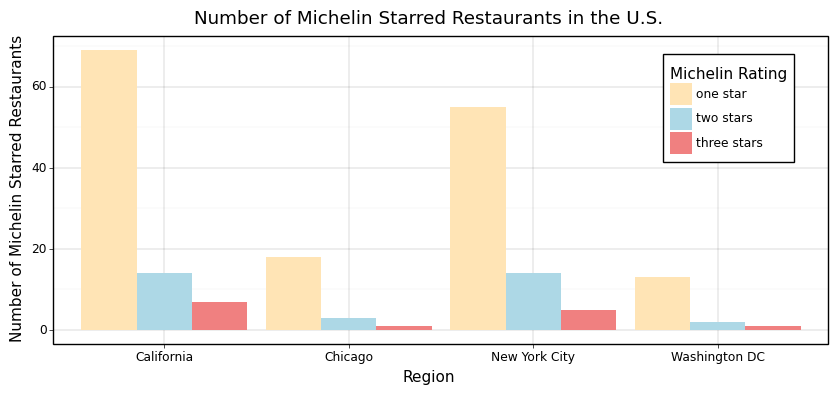

<ggplot: (302602433)>

In [15]:
# Bar plot
fig1 = (
    ggplot(df1,aes(x='region',y='name',fill='star')) +
    geom_bar(stat='identity',position='dodge') +
    labs(title='Number of Michelin Starred Restaurants in the U.S.',
         x='Region',y='Number of Michelin Starred Restaurants',fill='Michelin Rating') +
    scale_fill_manual(values=['moccasin','lightblue','lightcoral']) +
    theme_linedraw() +
    theme(legend_position=(.8,.7),
          legend_background=element_rect(color='black',size=1,fill='white'),
          legend_box_margin=3,
          figure_size=(10,4))
)

fig1.save('Figures/fig1.png', dpi=300, limitsize=False)
fig1

In [17]:
df.groupby(['region','cuisine','star'])['name'].count().reset_index()

,region,cuisine,star,name
0,California,American,one star,2
1,California,American,two stars,0
2,California,American,three stars,0
3,California,Asian,one star,1
4,California,Asian,two stars,0
...,...,...,...,...
283,Washington DC,Thai,two stars,0
284,Washington DC,Thai,three stars,0
285,Washington DC,Vegetarian,one star,0
286,Washington DC,Vegetarian,two stars,0
